## 1) Tweepy API

In [20]:
!pip install tweepy

In [21]:
import tweepy
import pandas as pd
import datetime

In [22]:
API_KEY= "h0dz4h8hzvKPCaAzqXZWqGMLH"
API_SECRET = "RT6hpWeGcosddXt6m36SuCJNnsPcqiZHIYiuFJFVyGoSMuhd7V"
ACCESS_TOKEN  = "1521795591126278144-GQdx9h3NtppK49Ko10O2NH8WdoBnKW"
ACCESS_TOKEN_SECRET = "w4q1vYbrZfgQOw46xQNnu2yeQiLHgUIt5M0HsgkUuzrSZ"

In [23]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(API_KEY,API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth , wait_on_rate_limit=True)

## 2) Select anti-Israel hashtags to create our dataset


We will annotate anti-Israel tweets that contains ones of the following hastags:


>#BDS4Israel OR #IsraeliCrimes OR #StopIsraeliApartheid OR #IsraeliStateTerrorOnGaza OR #BDS OR #Israeliterrorism OR #Israelioccupation OR #BoycottIsrael OR #EndIsraeliApartheid OR #ApartheidIsrael




In [24]:
htg ='#BDS4Israel #IsraeliCrimes #StopIsraeliApartheid #IsraeliStateTerrorOnGaza #BDS #Israeliterrorism #Israelioccupation #BoycottIsrael #EndIsraeliApartheid #ApartheidIsrael'

In [25]:
q = ' OR '.join(htg.split(' '))

In [26]:
q

'#BDS4Israel OR #IsraeliCrimes OR #StopIsraeliApartheid OR #IsraeliStateTerrorOnGaza OR #BDS OR #Israeliterrorism OR #Israelioccupation OR #BoycottIsrael OR #EndIsraeliApartheid OR #ApartheidIsrael'

In [27]:
df = pd.DataFrame({'tweet':[]})

# example on 10 rows
for status in tweepy.Cursor(api.search_tweets, q = q,lang="en", rpp=100, tweet_mode='extended', result_type='recent').items(10):
  try:
      # print(status.retweeted_status.full_text,end='\n___________\n')
      df=df.append({'tweet':status.retweeted_status.full_text}, ignore_index=True)

  except AttributeError:  # Not a Retweet
      # print(status.full_text,end='\n___________\n\n')
      df=df.append({'tweet':status.full_text}, ignore_index=True)

df

Unexpected parameter: rpp


,tweet
0,A message for @justinbieber \n\n#FreePalestine...
1,#JoeBiden is continuing to subsidize Israel's ...
2,Promoting a false narrative designed to inflam...
3,This is a good statement of the extent of #Apa...
4,@CombatASemitism @NGOmonitor @Ostrov_A @IbsiNo...
5,Justin Beiber is scheduled to return to Aparth...
6,"eye.on.palestine #Palestine | Hebron, Sahleh s..."
7,A message for @justinbieber \n\n#FreePalestine...
8,@JonahIvriAnochi @manifesto2000 @TopRantKing @...
9,@LeeJone50103071 Things get ignored when they ...


In [28]:
# df.to_csv('/twitter_data/tweet_10_anti.csv')

## 3) Select random tweets as no anti-Israel tweets

In [29]:
df = pd.DataFrame({'tweet':[]})

# example on 10 rows
for status in tweepy.Cursor(api.search_tweets, q = '#',lang="en", rpp=100, tweet_mode='extended', result_type='recent').items(10):
  try:
      # print(status.retweeted_status.full_text,end='\n___________\n')
      df=df.append({'tweet':status.retweeted_status.full_text}, ignore_index=True)

  except AttributeError:  # Not a Retweet
      # print(status.full_text,end='\n___________\n\n')
      df=df.append({'tweet':status.full_text}, ignore_index=True)

df

Unexpected parameter: rpp


,tweet
0,Brb switching twitter to a notebook
1,@atulysharma @Anujalankar9 True
2,This set is so cute! https://t.co/ir9x2NE8eq
3,☄️ Extraterrestrial Societies X Advent 😈\n\nGi...
4,"If you gently untie the bread nylon, you won't..."
5,I was thinking of this character who's ended u...
6,"His name is Aswad Ayinde,he directed the popul..."
7,There are people living on the streets who’ve ...
8,"Lisen Rylander’s voice appears on Dignity, who..."
9,@gcuriom $secretsnake


In [30]:
# df.to_csv('/twitter_data/tweet_11_neutral.csv')

## 4) Repeat data collection through time


We repeated this operations in differents days to have multiple tweets at different time

All our data are save in the **twitter_data** folder

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import numpy as np
import os

from collections import Counter
from itertools import chain


In [32]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords, wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Noy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Noy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Noy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Noy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [33]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## 1)a) Import Data

After colleting the data with tweepy API we will aggregate all csv file to one dataset

In [34]:
df_anti_list = []
df_neutral_list = []
all_files = []
path='./twitter_data/'

for fichier in os.listdir(path):
        all_files.append(fichier)

for filename in all_files:
    try:
        df = pd.read_csv(path+filename).drop('Unnamed: 0', axis =1)
    except:
        continue 
    if filename[-8:-4] == 'anti':
      df_anti_list.append(df)
    
    else:
      df_neutral_list.append(df)

df_anti = pd.concat(df_anti_list, axis=0, ignore_index= True)
df_anti['anti-Israel'] = 1

df_neutral = pd.concat(df_neutral_list, axis=0, ignore_index= True)
df_neutral['anti-Israel'] = 0


In [35]:
df_anti

,tweet,anti-Israel
0,What a joke…talk about twisting history\nDeath...,1
1,A completely unprovoked attack on #SaveSheikhJ...,1
2,#BDS Pressure Works!\n\n@HP-branded companies ...,1
3,@mishtal Amnesty International is not mistaken...,1
4,2 years since Eyad Al-Hallaq was murdered by a...,1
...,...,...
65602,"Lille, 15.05.21 🇵🇸\n#Palestine #FreePalestine ...",1
65603,New wave of #terrorism against #Syria by #Isra...,1
65604,"Lille, 15.05.21 🇵🇸👂🏼\n#Palestine #FreePalestin...",1
65605,Israeli police : \n\n“no disciplinary action w...,1


In [36]:
df_neutral

,tweet,anti-Israel
0,aries cancer libra capricorn gemini virgo\n\nw...,0
1,.@Safety_Canada Minister tells @SenateCA commi...,0
2,"Now, this is the way to do it..\n\n.https://t....",0
3,So cute 💛 https://t.co/TP0Xm1CNpi,0
4,"Join @GuyRyder, @ilo Director-General, Catheri...",0
...,...,...
43404,#NewProfilePic Beyond stoked to be able to joi...,0
43405,@Merrion I am in no way lambasting it - please...,0
43406,AC/DC - Live Wire (1979 Paris) https://t.co/X5...,0
43407,".@TNX_Official's '비켜' second MV teaser, has su...",0


In [37]:
df = pd.concat([df_anti, df_neutral], ignore_index=True, axis =0)

In [38]:
# our final dataset
df

,tweet,anti-Israel
0,What a joke…talk about twisting history\nDeath...,1
1,A completely unprovoked attack on #SaveSheikhJ...,1
2,#BDS Pressure Works!\n\n@HP-branded companies ...,1
3,@mishtal Amnesty International is not mistaken...,1
4,2 years since Eyad Al-Hallaq was murdered by a...,1
...,...,...
109011,#NewProfilePic Beyond stoked to be able to joi...,0
109012,@Merrion I am in no way lambasting it - please...,0
109013,AC/DC - Live Wire (1979 Paris) https://t.co/X5...,0
109014,".@TNX_Official's '비켜' second MV teaser, has su...",0


## 1)b Unbalanced dataset

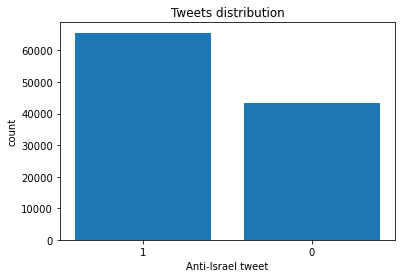

In [39]:
vc = df['anti-Israel'].value_counts()
plt.bar((vc.index).astype('str'), vc)
plt.ylabel('count')
plt.xlabel('Anti-Israel tweet')
plt.title('Tweets distribution')
plt.show()

We have an ubalance dataset, we will duplicate some rows of no-anti-Israel tweets in order to have a balance dataset

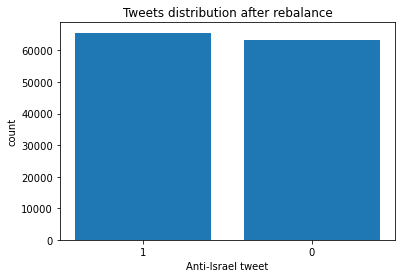

In [40]:
df = pd.concat([df_anti, df_neutral, df_neutral.sample(20000)], ignore_index=True, axis =0)

vc = df['anti-Israel'].value_counts()
plt.bar((vc.index).astype('str'), vc)
plt.ylabel('count')
plt.xlabel('Anti-Israel tweet')
plt.title('Tweets distribution after rebalance')
plt.show()

## 2) Data Preprocessing 


In [41]:
# drop all incomplete tweets (finish with …)
t = df.tweet.map(lambda x:x[-1]=='…')
df = df.drop(t[t].index, axis=0)

In [42]:
df  = df.reset_index(drop=True)
df

,tweet,anti-Israel
0,What a joke…talk about twisting history\nDeath...,1
1,A completely unprovoked attack on #SaveSheikhJ...,1
2,#BDS Pressure Works!\n\n@HP-branded companies ...,1
3,@mishtal Amnesty International is not mistaken...,1
4,2 years since Eyad Al-Hallaq was murdered by a...,1
...,...,...
107046,Shiv.inrudra ... priy_ank1802 \n\nId account h...,0
107047,Doha is so cute 🥹 https://t.co/16bScuCDQ2,0
107048,Subtle mistakes felt like life or death,0
107049,@adamdovico I love that. You can hand him thi...,0


In [43]:
# Set of the specifics char and stop words to drop
SET_SPE_CHAR = (
    set(string.punctuation)
    | set(stopwords.words("english")) | {'amp','let','need', 'one', 'day', 'year', 'people', 'like',\
                                         'night', 'today', 'must', 'get', 'now', 'make', 'want', 'another',\
                                        'time', 'never', 'even', 'say', 'know'}
)

In [44]:
def clean_text(text):
    """
    This function takes a string and returns the string without:
    url / hashtags /linebreaks / mame started by @ / numbers
    """
    text = text.lower()
    text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", " ", text)
    text = re.sub(r'@\S+', ' ',text)
    text = re.sub(r'#\w+', ' ',text)
    text = re.sub(r'\d+', '',text)
    text = re.sub(r'[\r\n]+', ' ',text)
    text = text.replace("\\n", " ")
    # text = re.sub(r"(#\w+){2,}", " ", text)
    return text

In [45]:
def existing_word(word):
    """
    This function takes a string
    Return lemmatize string if it is in our vocabulary sets and len>1
    else None
    """
    lemmatizer=WordNetLemmatizer()
    lem_word = lemmatizer.lemmatize(word)
    if (wordnet.synsets(lem_word) != []) and len(lem_word)>1:
        return lem_word
    return None

In [46]:
def plot_dic(dic, title='title'):
    """
    This function takes a dictionnary with words as key and a number(count or frequency) as value, 
    a string title and a number k 
    and plots an histogram of k words with the highest value in desc order
    """
    pd.DataFrame.from_dict(dict(zip(list(dic.keys()), list(dic.values()))), orient="index").plot(
    kind="bar", figsize=(18, 7))
    plt.ylabel(title)
    plt.title(title)
    plt.show()

In [47]:
def serie_counter(df_column):
    """
    This function takes a dataframe column of list of columns, aggragate all list
    and return a counter dic of the words
    """
    token_list = list(chain.from_iterable(df_column.values))
    print(len(set(token_list)))

    return Counter(token_list)

In [48]:
df['clean_tweet'] = df['tweet'].apply(clean_text)
df["token"] = df["clean_tweet"].apply(word_tokenize)

In [49]:
df['hashtags'] = df['tweet'].map(lambda tweet: re.findall(r"#(\w+)", tweet))
df['nb_hashtags'] = df['hashtags'].map(lambda lst: len(lst))

In [50]:
df.head()

,tweet,anti-Israel,clean_tweet,token,hashtags,nb_hashtags
0,What a joke…talk about twisting history\nDeath...,1,what a joke…talk about twisting history death ...,"[what, a, joke…talk, about, twisting, history,...","[FreePalestine, ICC4Israel, BDS]",3
1,A completely unprovoked attack on #SaveSheikhJ...,1,a completely unprovoked attack on yesterday ...,"[a, completely, unprovoked, attack, on, yester...","[SaveSheikhJarrah, ApartheidIsrael, Israeli, t...",4
2,#BDS Pressure Works!\n\n@HP-branded companies ...,1,pressure works! companies end major contra...,"[pressure, works, !, companies, end, major, co...",[BDS],1
3,@mishtal Amnesty International is not mistaken...,1,"amnesty international is not mistaken, amnes...","[amnesty, international, is, not, mistaken, ,,...","[FreePalestine, BoycottIsrael]",2
4,2 years since Eyad Al-Hallaq was murdered by a...,1,years since eyad al-hallaq was murdered by a ...,"[years, since, eyad, al-hallaq, was, murdered,...",[EndIsraeliApartheid],1


In [51]:
df.loc[(df.nb_hashtags == 0) & (df['anti-Israel']==1)]

,tweet,anti-Israel,clean_tweet,token,hashtags,nb_hashtags


In [52]:
df["clean_token"] = df["token"].map(
    lambda lst: [
        existing_word(tk)
        for tk in lst
        if tk not in SET_SPE_CHAR and existing_word(tk) != None
    ]
)


df["nb_clean_token"] = df["clean_token"].map(lambda lst: len(lst))

In [53]:
df["nb_clean_token"] = df["clean_token"].map(lambda lst: len(lst))

In [54]:
df.head()

,tweet,anti-Israel,clean_tweet,token,hashtags,nb_hashtags,clean_token,nb_clean_token
0,What a joke…talk about twisting history\nDeath...,1,what a joke…talk about twisting history death ...,"[what, a, joke…talk, about, twisting, history,...","[FreePalestine, ICC4Israel, BDS]",3,"[twisting, history, death, thousand, cut, exac...",13
1,A completely unprovoked attack on #SaveSheikhJ...,1,a completely unprovoked attack on yesterday ...,"[a, completely, unprovoked, attack, on, yester...","[SaveSheikhJarrah, ApartheidIsrael, Israeli, t...",4,"[completely, unprovoked, attack, yesterday, sc...",15
2,#BDS Pressure Works!\n\n@HP-branded companies ...,1,pressure works! companies end major contra...,"[pressure, works, !, companies, end, major, co...",[BDS],1,"[pressure, work, company, end, major, contract...",21
3,@mishtal Amnesty International is not mistaken...,1,"amnesty international is not mistaken, amnes...","[amnesty, international, is, not, mistaken, ,,...","[FreePalestine, BoycottIsrael]",2,"[amnesty, international, mistaken, amnesty, de...",15
4,2 years since Eyad Al-Hallaq was murdered by a...,1,years since eyad al-hallaq was murdered by a ...,"[years, since, eyad, al-hallaq, was, murdered,...",[EndIsraeliApartheid],1,"[year, murdered, old, israeli, police, officer...",17


In [55]:
df['clean_token_hashtags'] = df['hashtags'] + df['clean_token']

In [56]:
df.head()

,tweet,anti-Israel,clean_tweet,token,hashtags,nb_hashtags,clean_token,nb_clean_token,clean_token_hashtags
0,What a joke…talk about twisting history\nDeath...,1,what a joke…talk about twisting history death ...,"[what, a, joke…talk, about, twisting, history,...","[FreePalestine, ICC4Israel, BDS]",3,"[twisting, history, death, thousand, cut, exac...",13,"[FreePalestine, ICC4Israel, BDS, twisting, his..."
1,A completely unprovoked attack on #SaveSheikhJ...,1,a completely unprovoked attack on yesterday ...,"[a, completely, unprovoked, attack, on, yester...","[SaveSheikhJarrah, ApartheidIsrael, Israeli, t...",4,"[completely, unprovoked, attack, yesterday, sc...",15,"[SaveSheikhJarrah, ApartheidIsrael, Israeli, t..."
2,#BDS Pressure Works!\n\n@HP-branded companies ...,1,pressure works! companies end major contra...,"[pressure, works, !, companies, end, major, co...",[BDS],1,"[pressure, work, company, end, major, contract...",21,"[BDS, pressure, work, company, end, major, con..."
3,@mishtal Amnesty International is not mistaken...,1,"amnesty international is not mistaken, amnes...","[amnesty, international, is, not, mistaken, ,,...","[FreePalestine, BoycottIsrael]",2,"[amnesty, international, mistaken, amnesty, de...",15,"[FreePalestine, BoycottIsrael, amnesty, intern..."
4,2 years since Eyad Al-Hallaq was murdered by a...,1,years since eyad al-hallaq was murdered by a ...,"[years, since, eyad, al-hallaq, was, murdered,...",[EndIsraeliApartheid],1,"[year, murdered, old, israeli, police, officer...",17,"[EndIsraeliApartheid, year, murdered, old, isr..."


## 3) EDA

### a) Distribution of token

C:\Users\Noy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Noy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


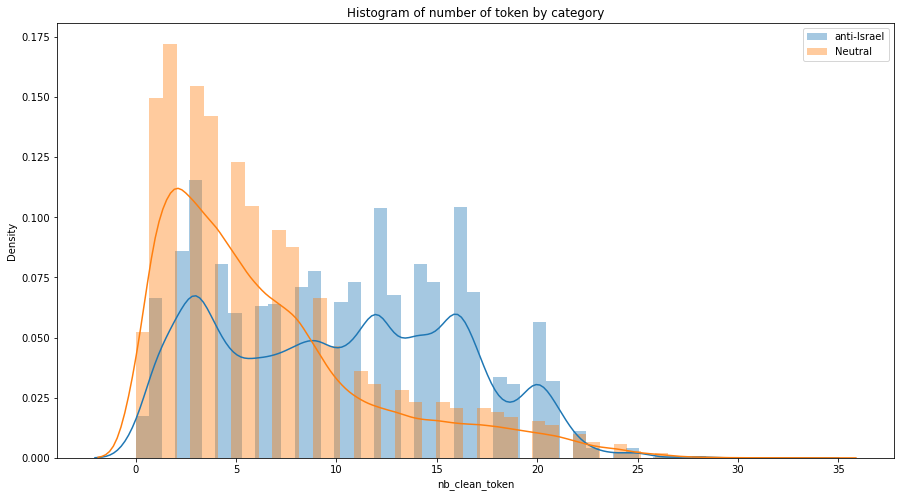

In [57]:
plt.figure(figsize=(15,8))
sns.distplot(a=df.loc[df['anti-Israel']==1, "nb_clean_token"], label ='anti-Israel')
sns.distplot(a=df.loc[df['anti-Israel']==0, "nb_clean_token"], label ='Neutral')
plt.title('Histogram of number of token by category')
plt.legend()
plt.show()

We can see in our dataset that anti-Israel tweets have more token on average

### b) Distribution of number of hastags

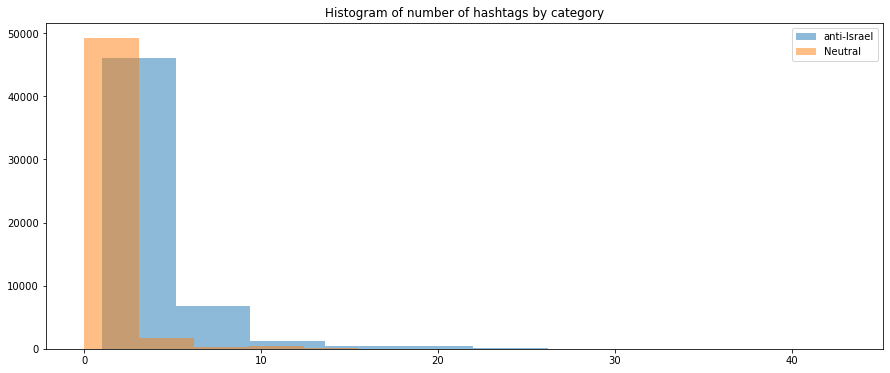

In [58]:
plt.figure(figsize=(15,6))
plt.hist(df.loc[df['anti-Israel']==1, "nb_hashtags"], label ='anti-Israel',alpha=0.5)
plt.hist(df.loc[df['anti-Israel']==0, "nb_hashtags"], label ='Neutral',alpha=0.5)
plt.title('Histogram of number of hashtags by category')
plt.legend()
plt.show()

We can see in our dataset that anti-Israel tweets have more hashtags on average

### c) Word count with hastags

30889


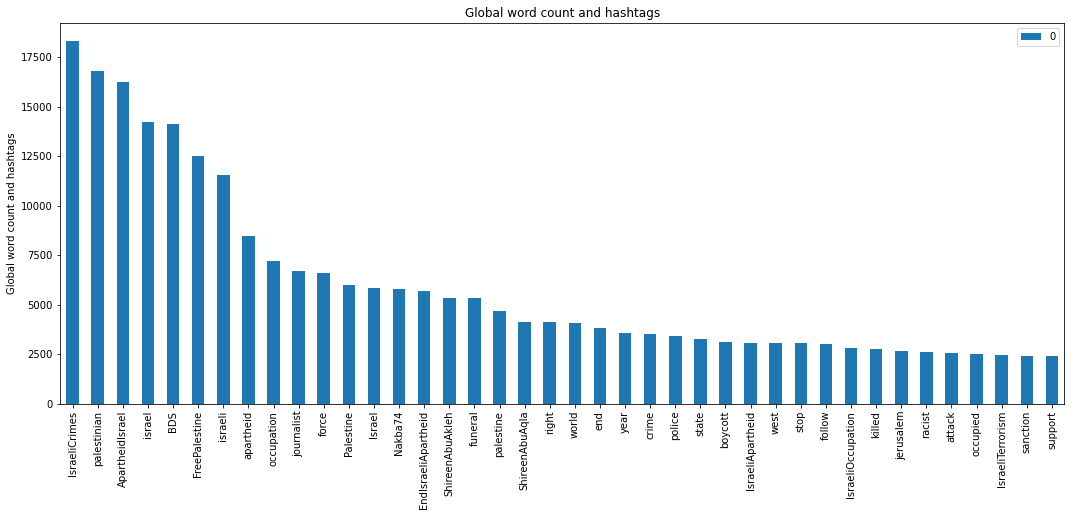

In [59]:
plot_dic(dict(serie_counter(df["clean_token_hashtags"]).most_common(40)), 'Global word count and hashtags')

### d) Word count without hastags

19027


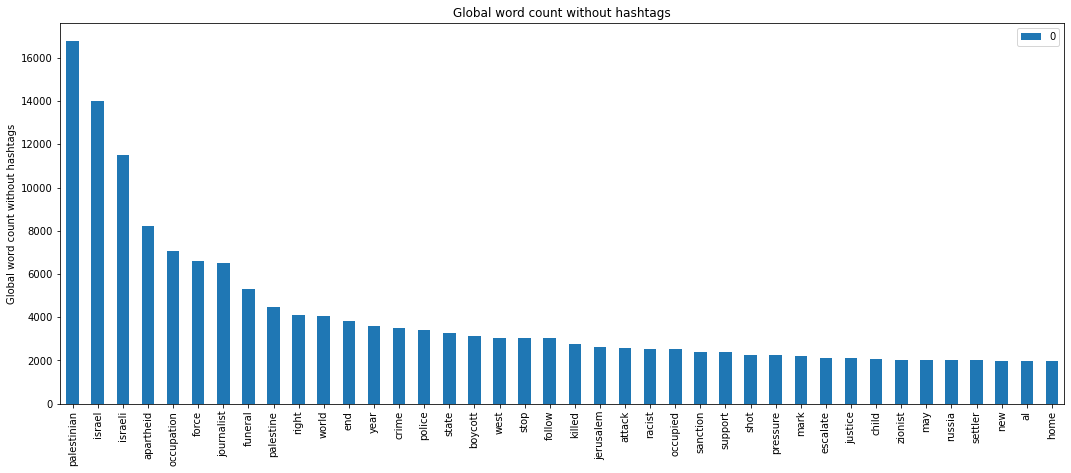

In [60]:
plot_dic(dict(serie_counter(df["clean_token"]).most_common(40)), 'Global word count without hashtags')

## 4)a Modeling on clean token + hashtags

In [61]:
X = df.clean_token_hashtags.map(lambda x: (' ').join(x))
y = df['anti-Israel']

In [62]:
#TFIDF Vectorizer
vectorizer = TfidfVectorizer(max_features=500000)

#Convert df.txt from text to features
X = vectorizer.fit_transform(X)

# df['tfidf_Vect'] = list(X.toarray())

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13020
           1       0.99      1.00      0.99     13743

    accuracy                           0.99     26763
   macro avg       0.99      0.99      0.99     26763
weighted avg       0.99      0.99      0.99     26763
 




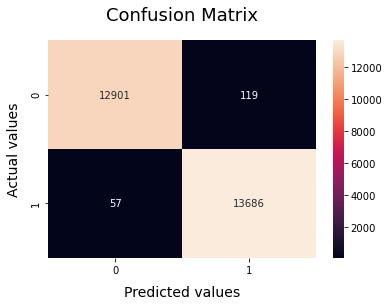

In [64]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred = BNBmodel.predict(X_test)
print(classification_report(y_test, y_pred),'\n\n')

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13020
           1       1.00      1.00      1.00     13743

    accuracy                           1.00     26763
   macro avg       1.00      1.00      1.00     26763
weighted avg       1.00      1.00      1.00     26763
 




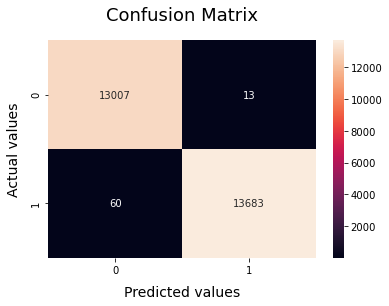

In [65]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

y_pred = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred),'\n\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

## 4)b) Modeling on clean token without hashtags

In [66]:
X = df.clean_token.map(lambda x: (' ').join(x))
y = df['anti-Israel']

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13020
           1       0.98      0.85      0.91     13743

    accuracy                           0.92     26763
   macro avg       0.92      0.92      0.91     26763
weighted avg       0.92      0.92      0.91     26763
 




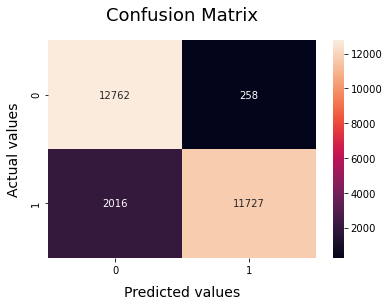

In [67]:
#TFIDF Vectorizer
vectorizer = TfidfVectorizer(max_features=500000)

#Convert df.txt from text to features
X = vectorizer.fit_transform(X)

# df['tfidf_Vect'] = list(X.toarray())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred = BNBmodel.predict(X_test)
print(classification_report(y_test, y_pred),'\n\n')

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13020
           1       0.98      0.92      0.95     13743

    accuracy                           0.95     26763
   macro avg       0.95      0.95      0.95     26763
weighted avg       0.95      0.95      0.95     26763
 




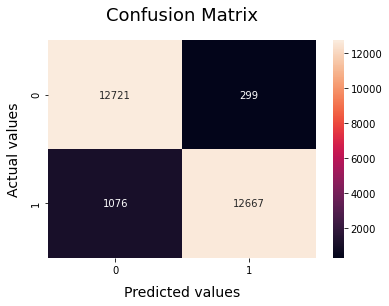

In [68]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

y_pred = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred),'\n\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

## 5) Conclusion

If I had to detect anti-Israel tweets I will use the training set with the hastags if I have to detect anti-israel text for example in forums, news paper or other social network _(*where we do not use hastags)_ I will use the training without hastags


I am consious that we train our model on specific hastags that could not be representative so we have a chance to overfit this dataset